In [1]:
# Authors: Hayk Mkrtchyan, Norayr Hayruni
# Class:   Financial Instruments: Stocks, Bonds, Derivatives and Hedge Funds
# Date:    14.06.2021
# Topic:   'Forecasting Gold Prices: Evidence from Support Vector Machines and Neural Networks' 

In [2]:
# Make sure to have Pycaret installed on your machine. The following code may do it for you.     
# pip install pycaret                   

In [79]:
# Importing libraries  
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table
from datetime import datetime
from datetime import datetime, timedelta
import seaborn as sns
from pycaret.regression import *
from pycaret.classification import *
import tensorflow as tf 
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [84]:
# Importing dataset, filling in the missing values and Illustrating it
data = pd.read_excel('data.xlsx', sheet_name='All Variables')
data = data.fillna(method="ffill",axis=0)
data = data.fillna(method="bfill",axis=0)
data.head().round(decimals=2)

,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000,10 T-Note,Nasdaq,MSCI EM ETF,Euro USD,Platinum,Copper,Soybean Futures,NYSE,Euronext100
0,2010-01-01,1117.7,17.44,81.51,1132.99,640.10,115.53,2308.42,33.96,1.44,1517.3,3.39,1049.50,7326.74,696.99
1,2010-01-04,1117.7,17.44,81.51,1132.99,640.10,115.53,2308.42,33.96,1.44,1517.3,3.39,1049.50,7326.74,696.99
2,2010-01-05,1118.1,17.78,81.77,1136.52,638.49,116.20,2308.71,34.21,1.44,1530.8,3.40,1052.25,7354.87,697.57
3,2010-01-06,1135.9,18.16,83.18,1137.14,637.95,115.97,2301.09,34.28,1.44,1552.2,3.48,1050.50,7377.70,698.27
4,2010-01-07,1133.1,18.33,82.66,1141.69,641.97,115.84,2300.05,34.08,1.43,1553.0,3.41,1017.75,7393.93,697.76
5,2010-01-08,1138.2,18.46,82.75,1144.98,644.56,116.03,2317.17,34.35,1.44,1564.6,3.39,1013.00,7425.35,701.38
6,2010-01-11,1150.7,18.68,82.52,1146.98,643.99,116.03,2312.41,34.28,1.45,1588.3,3.43,1001.75,7449.05,700.72
7,2010-01-12,1128.9,18.24,80.79,1136.22,635.50,116.75,2282.31,33.73,1.45,1573.9,3.34,969.50,7370.45,693.50
8,2010-01-13,1136.4,18.54,79.65,1145.68,643.56,116.39,2307.90,33.83,1.45,1570.2,3.39,983.50,7430.14,694.44
9,2010-01-14,1142.6,18.64,79.39,1148.46,646.43,116.75,2316.74,33.75,1.45,1600.1,3.38,968.50,7448.52,696.32


In [5]:
 # Checking for missing values and confirming that there is none 
print(data.isna().sum())

Date               0
Gold               0
Silver             0
Crude Oil          0
S&P500             0
Russel 2000        0
10 T-Note          0
Nasdaq             0
MSCI EM ETF        0
Euro USD           0
Platinum           0
Copper             0
Soybean Futures    0
NYSE               0
Euronext100        0
dtype: int64


In [6]:
# Now let's import the ticker names from another excel sheet and 
# store the tickers and their respective names in separate variables for further use
ticker_details  = pd.read_excel('data.xlsx', sheet_name='Ticker Names')           # reading the excel file
ticker = ticker_details.loc[:, 'Ticker'].to_list()                                # extracting the tickers
names = ticker_details.loc[:, 'Description'].to_list()                            # extracting the names 
names.insert(0,'Date')                                                     
#data.columns = names                                   
cols=data.columns.drop('Date')                                                    
data[cols] = data[cols].apply(pd.to_numeric,errors='coerce').round(decimals=1)    # Coercing all data values to numeric values

In [7]:
# Some descriptive statistics on our variables
data.describe().round(decimals=2)

,Gold,Silver,Crude Oil,S&P500,Russel 2000,10 T-Note,Nasdaq,MSCI EM ETF,Euro USD,Platinum,Copper,Soybean Futures,NYSE,Euronext100
count,2609.00,2609.00,2609.00,2609.00,2609.00,2609.00,2609.00,2609.00,2609.00,2609.00,2609.00,2609.00,2609.00,2609.00
mean,1346.72,21.10,72.48,1962.61,1134.75,126.31,4744.01,35.92,1.23,1249.04,3.07,1121.24,10161.89,843.00
std,179.24,7.07,21.90,589.09,312.95,4.41,1879.29,4.08,0.12,329.03,0.57,230.29,1943.42,159.67
min,1050.80,13.70,26.20,1022.60,586.50,115.00,2091.80,25.30,1.00,768.70,1.90,791.00,6434.80,529.50
25%,1224.50,16.30,52.50,1385.30,825.50,123.60,2976.20,33.10,1.10,935.50,2.70,937.80,8277.80,697.50
50%,1293.30,17.80,71.30,1986.50,1150.70,126.30,4620.70,35.60,1.20,1216.60,3.10,1022.50,10441.00,845.80
75%,1436.80,24.00,93.50,2433.10,1399.20,129.90,6221.90,38.40,1.30,1537.00,3.40,1337.50,11699.80,992.50
max,1888.70,48.60,113.90,3240.00,1740.80,135.70,9022.40,48.50,1.50,1905.70,4.60,1771.00,13944.10,1156.60


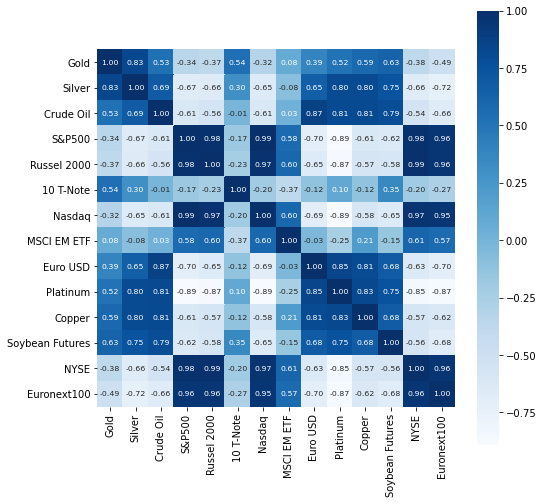

In [8]:
# Correlation Matrix
corr = data.corr(method = 'pearson')   
plt.figure(figsize= (8, 8))
sns.heatmap(corr, cbar=True, square=True, fmt = '.2f', annot=True, annot_kws={'size': 7.8}, cmap = 'Blues')
plt.savefig('correlation_matrix.png',  transparent=True, dpi=200)
# From the below corrlation matrix, one can observe that gold is highly positively correlated with silver, platinum 
# and other metals. On the other hand, gold is negatively correlated with equities.   

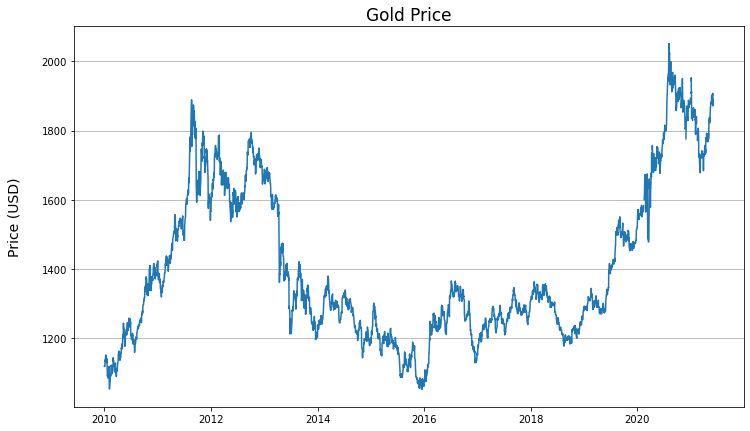

In [9]:
# The Historical development of the gold price (2010-2021)
data_illustration = pd.read_excel('data.xlsx', sheet_name='Gold Price')
plt.figure(figsize=(12,7))
plt.plot('Date', 'Gold', data=data_illustration)
plt.grid(axis='y')
plt.ylabel('Price (USD)\n', size=14)
plt.title('Gold Price', size = 17)
plt.savefig('Gold Price.png', dpi=200, transparent=True)

In [10]:
# calculating short-term returns of all explanatory variables (we have tried various short-term returns of variables
# however only the 21 days return are worth to include in our regression analysis, 
# since the other returns turned out to be highly insignificant predictors.
rets = pd.DataFrame(data=data['Date'])
x = data[cols].pct_change(periods=21).add_suffix('-t-21')
rets = pd.concat(objs=(rets, x), axis = 1)

In [11]:
#calculating long-term historical returns of selected instruments (we have tried to see whether the long-term returns of 
#these variables are able to explain the price of the Gold)
period = [60,90,180,250]
sel_var = ['Gold','Silver', 'Crude Oil', 'S&P500','MSCI EM ETF', 'Soybean Futures', 'NYSE']
for i in period:
    x = data[sel_var].pct_change(periods=i).add_suffix('-t-'+str(i))
    rets=pd.concat(objs=(rets, x), axis=1)

In [12]:
rets.tail()  # Having a look at the explainatory variables we have created so far

,Date,Gold-t-21,Silver-t-21,Crude Oil-t-21,S&P500-t-21,Russel 2000-t-21,10 T-Note-t-21,Nasdaq-t-21,MSCI EM ETF-t-21,Euro USD-t-21,Platinum-t-21,Copper-t-21,Soybean Futures-t-21,NYSE-t-21,Euronext100-t-21,Gold-t-60,Silver-t-60,Crude Oil-t-60,S&P500-t-60,MSCI EM ETF-t-60,Soybean Futures-t-60,NYSE-t-60,Gold-t-90,Silver-t-90,Crude Oil-t-90,S&P500-t-90,MSCI EM ETF-t-90,Soybean Futures-t-90,NYSE-t-90,Gold-t-180,Silver-t-180,Crude Oil-t-180,S&P500-t-180,MSCI EM ETF-t-180,Soybean Futures-t-180,NYSE-t-180,Gold-t-250,Silver-t-250,Crude Oil-t-250,S&P500-t-250,MSCI EM ETF-t-250,Soybean Futures-t-250,NYSE-t-250
2604,2019-12-26,0.038462,0.059172,0.061962,0.027366,0.026681,-0.007728,0.036438,0.060241,0.0,0.047645,0.074074,0.063265,0.024457,0.018171,0.001460,0.017045,0.175238,0.113138,0.125320,0.028515,0.098898,0.008014,0.052941,0.115732,0.108454,0.157895,0.095561,0.098664,0.186650,0.201342,-0.035937,0.115284,0.037736,0.065077,0.078753,0.174827,0.147436,0.173004,0.247747,0.128205,0.047236,0.177468
2605,2019-12-27,0.041558,0.053254,0.061962,0.027397,0.021357,-0.005410,0.034623,0.065060,0.0,0.044564,0.037037,0.053855,0.024729,0.022454,0.005046,0.017143,0.168561,0.097561,0.124682,0.014516,0.086708,-0.008385,0.022989,0.138376,0.138000,0.178667,0.102348,0.123030,0.190188,0.194631,-0.035937,0.115318,0.042453,0.055650,0.079039,0.176132,0.141026,0.195736,0.247930,0.139175,0.033697,0.176916
2606,2019-12-30,0.042039,0.059172,0.061962,0.025565,0.024438,-0.006955,0.032370,0.075980,0.0,0.053807,0.037037,0.065193,0.024437,0.014690,0.011217,0.022857,0.168561,0.096128,0.125641,0.026552,0.085970,-0.007731,0.017045,0.151119,0.119129,0.164456,0.100375,0.108358,0.189242,0.193333,-0.060883,0.107737,0.042755,0.071266,0.074483,0.174851,0.147436,0.221782,0.247309,0.140260,0.054670,0.176039
2607,2019-12-31,0.039116,0.059524,0.091071,0.037541,0.037883,-0.003879,0.047222,0.078431,0.0,0.082581,0.076923,0.083285,0.034555,0.030620,0.014894,0.011364,0.161597,0.116726,0.136951,0.024443,0.105004,-0.013952,-0.016575,0.112933,0.126028,0.167109,0.114394,0.115360,0.197117,0.202703,-0.078431,0.101271,0.042654,0.093968,0.070741,0.181387,0.148387,0.172745,0.237712,0.136951,0.055755,0.172243
2608,2020-01-01,0.027939,0.040936,0.089127,0.044485,0.041121,-0.012308,0.053048,0.083744,0.0,0.068412,0.076923,0.082664,0.040917,0.039608,0.008897,0.005650,0.161597,0.106666,0.128205,0.020784,0.096271,-0.011900,-0.027322,0.094982,0.118737,0.164021,0.105769,0.107793,0.191298,0.194631,-0.072838,0.103717,0.055156,0.102666,0.074230,0.176448,0.141026,0.168260,0.234968,0.122449,0.054220,0.168413


In [13]:
# Creatig a new dataframe to compute the long-term moving averages of the gold price. We believe that the moving averages 
# of gold for 90 and 180 days are able to predict the future gold price. Again, we tried many combinations (other time horizons) 
# until we decided to include only these two.
mov_average = pd.DataFrame(data['Date'], columns=['Date'])
mov_average['Date'] = pd.to_datetime(mov_average['Date'], format='%Y-%b-%d')
mov_average['Gold/90SMA'] = (data['Gold']/(data['Gold'].rolling(window=90).mean()))-1
mov_average['Gold/180SMA'] = (data['Gold']/(data['Gold'].rolling(window=180).mean()))-1
rets['Date'] = pd.to_datetime(rets['Date'], format='%Y-%b-%d')
rets = pd.merge(left=rets, right=mov_average, how='left', on='Date')

In [14]:
# Now, let's create our variable of interest for prediction. In our regression analysis, we decided to predict the 30 day
# return of the gold, and hence its price. 
y_var = pd.DataFrame(data=data['Date'])
y_var['Gold-t+30'] = data['Gold'].pct_change(periods = -30)

In [15]:
# Dropping NA values  
rets = rets[rets['Gold-t-250'].notna()]
y_var = y_var[y_var['Gold-t+30'].notna()]

In [16]:
# Merging the dependent variable with all our independent variables in one dataframe
rets = pd.merge(left=rets, right=y_var, how='inner', on='Date', suffixes=(False,False))

In [17]:
rets.isna().sum()    # Making sure that there are not missing values in the final dataset

Date                     0
Gold-t-21                0
Silver-t-21              0
Crude Oil-t-21           0
S&P500-t-21              0
Russel 2000-t-21         0
10 T-Note-t-21           0
Nasdaq-t-21              0
MSCI EM ETF-t-21         0
Euro USD-t-21            0
Platinum-t-21            0
Copper-t-21              0
Soybean Futures-t-21     0
NYSE-t-21                0
Euronext100-t-21         0
Gold-t-60                0
Silver-t-60              0
Crude Oil-t-60           0
S&P500-t-60              0
MSCI EM ETF-t-60         0
Soybean Futures-t-60     0
NYSE-t-60                0
Gold-t-90                0
Silver-t-90              0
Crude Oil-t-90           0
S&P500-t-90              0
MSCI EM ETF-t-90         0
Soybean Futures-t-90     0
NYSE-t-90                0
Gold-t-180               0
Silver-t-180             0
Crude Oil-t-180          0
S&P500-t-180             0
MSCI EM ETF-t-180        0
Soybean Futures-t-180    0
NYSE-t-180               0
Gold-t-250               0
S

In [18]:
# After finalizing the dataset, it is time to do a regression analysis and prediction. For Regression analysis we will stick 
# with a pycaret library. It is worth mentioning that pycaret is a powerful library, which allows to run numerious ML algorithms 
# in a coherent and practical manner. In addition, feature scaling of the variables are done on the background of Pycaret, 
# therefore there is no need to do it separately. 

In [19]:
# Pycaret: The first step in pycaret is to initialize the regression function. 
# About the parameters of initialize function - note that pycaret will do 10 cross validation and produce the mean results. 
# Another key parameter here to notice is the fold strategy, which should be set to timeseries, since we are dealing with timeseries data.
# In addition, in case the profile is set to True, data profile for Explanetory Data Analysis will be 
# displayed in an interactive HTML report. At this point, we don't need it.
from pycaret.regression import *
initialize = setup(rets, target='Gold-t+30',
        ignore_features=['Date'], session_id=11,          
        silent=True, profile=False, train_size = 0.75,
        remove_outliers=True, outliers_threshold = 0.05, fold_strategy='timeseries', fold=10, ignore_low_variance = False, 
        remove_perfect_collinearity = True, multicollinearity_threshold = 0.85)

# In the comparision, one can specify other ML algorithms as well. I have mentioned the ones which after several trials turn out 
# to perform good at predicting the future gold price. However, one can experiment with others as well. 
comparison = compare_models(turbo=True, include = ['svm', 'catboost', 'lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0151,0.0005,0.0210,0.7929,0.0188,0.9428,8.8340
lightgbm,Light Gradient Boosting Machine,0.0167,0.0006,0.0232,0.7534,0.0204,1.2255,0.2930
svm,Support Vector Regression,0.0350,0.0020,0.0451,0.1737,0.0375,1.7877,0.5830


In [20]:
# Since our project requires from us to experiment the SVM, which we do later on in classification part, we decided to observe 
# its predicting power in forecasting the future gold price. Therefore, we create SVM model here. 
# Below you can find the results of our different regression models after 10 cross validations
svm = create_model('svm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0329,0.0020,0.0444,-0.0537,0.0342,1.5842
1,0.0339,0.0020,0.0446,0.1807,0.0395,1.4358
2,0.0339,0.0020,0.0445,0.1852,0.0386,1.3991
3,0.0344,0.0021,0.0457,0.1619,0.0406,2.4657
4,0.0369,0.0022,0.0466,0.0979,0.0364,1.9286
5,0.0336,0.0018,0.0429,0.1788,0.0345,1.6183
6,0.0369,0.0021,0.0462,0.2601,0.0387,2.1239
7,0.0383,0.0023,0.0478,0.2546,0.0398,1.1673
8,0.0355,0.0022,0.0466,0.1915,0.0386,3.0138
9,0.0336,0.0017,0.0416,0.2800,0.0344,1.1409


In [21]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0242,0.0012,0.0349,0.3478,0.0278,1.2574
1,0.0201,0.0009,0.0295,0.6431,0.0263,1.2980
2,0.0153,0.0004,0.0211,0.8167,0.0190,1.2800
3,0.0145,0.0004,0.0198,0.8423,0.0180,0.7343
4,0.0156,0.0005,0.0216,0.8072,0.0202,0.8780
5,0.0127,0.0003,0.0171,0.8699,0.0155,0.8883
6,0.0133,0.0003,0.0181,0.8868,0.0167,0.8384
7,0.0134,0.0003,0.0186,0.8872,0.0172,0.4933
8,0.0117,0.0003,0.0166,0.8974,0.0152,1.2399
9,0.0102,0.0002,0.0129,0.9306,0.0119,0.5205


In [22]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0251,0.0013,0.0364,0.2922,0.0289,1.6799
1,0.0217,0.0010,0.0313,0.5966,0.0273,1.3051
2,0.0170,0.0006,0.0243,0.7578,0.0217,1.3697
3,0.0174,0.0006,0.0248,0.7532,0.0215,1.2527
4,0.0174,0.0005,0.0233,0.7745,0.0209,1.1115
5,0.0138,0.0003,0.0187,0.8444,0.0165,1.0195
6,0.0141,0.0004,0.0195,0.8683,0.0179,1.0576
7,0.0151,0.0004,0.0210,0.8568,0.0190,0.5788
8,0.0129,0.0003,0.0176,0.8840,0.0163,2.2859
9,0.0120,0.0002,0.0150,0.9063,0.0137,0.5941


In [23]:
# Now, let's do something interactive. We will use the above created model to predict the future gold price on a new dataset 
# which was neither a part of our training nor testing data
# It is worth to mention that for a regression we decided to predict the return of a gold 30 days ahead,
# hence its price. So let's save the created models and implement our predictions on new data w
reg2_30_days = save_model(svm, model_name='Pred_30_days_svm')
reg3_30_days = save_model(lightgbm, model_name='Pred_30_days_lightgbm')
reg4_30_days = save_model(catboost, model_name = 'Pred_30_days_catboost')

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved


In [24]:
# We will import the new data from another sheet of the excel file, and the data spans from 2020-01-02 to 2021-06-04, however some observations
# will be dropped out later, since when computing the long-run returns of our explanatory variables, various NA values come out as before.
new_data = pd.read_excel('data.xlsx', sheet_name='Validation')

In [25]:
new_data.head().round(decimals=2)

,Date,GC=F,SI=F,CL=F,^GSPC,^RUT,ZN=F,^IXIC,EEM,EURUSD=X,PL=F,HG=F,ZS=F,^NYA,^N100
0,2020-01-02,1524.5,17.97,61.18,3257.85,1666.77,128.62,9092.19,45.05,1.12,978.6,2.83,944.25,14002.49,1158.26
1,2020-01-03,1549.2,18.07,63.05,3234.85,1660.87,129.39,9020.77,44.21,1.12,984.5,2.80,930.50,13917.05,1157.38
2,2020-01-06,1566.2,18.10,63.27,3246.28,1663.26,129.25,9071.47,44.11,1.12,960.4,2.80,932.75,13941.80,1151.81
3,2020-01-07,1571.8,18.32,62.70,3237.18,1658.31,129.16,9068.58,44.08,1.12,966.0,2.80,935.00,13898.45,1153.09
4,2020-01-08,1557.4,18.09,59.61,3253.05,1663.59,128.77,9129.24,44.33,1.12,959.0,2.82,938.25,13934.44,1155.38


In [26]:
new_data.columns = names  # Renaming the column names for the ease of understanding the explanatory variables 

In [27]:
# Filling in the missing values
new_data = new_data.fillna(method="ffill", axis=0)
new_data = new_data.fillna(method="bfill", axis=0)
cols = new_data.columns.drop('Date')
new_data[cols] = new_data[cols].apply(pd.to_numeric, errors='coerce').round(decimals=1)
new_data.head()

,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000,10 T-Note,Nasdaq,MSCI EM ETF,Euro USD,Platinum,Copper,Soybean Futures,NYSE,Euronext100
0,2020-01-02,1524.5,18.0,61.2,3257.9,1666.8,128.6,9092.2,45.1,1.1,978.6,2.8,944.2,14002.5,1158.3
1,2020-01-03,1549.2,18.1,63.0,3234.9,1660.9,129.4,9020.8,44.2,1.1,984.5,2.8,930.5,13917.0,1157.4
2,2020-01-06,1566.2,18.1,63.3,3246.3,1663.3,129.2,9071.5,44.1,1.1,960.4,2.8,932.8,13941.8,1151.8
3,2020-01-07,1571.8,18.3,62.7,3237.2,1658.3,129.2,9068.6,44.1,1.1,966.0,2.8,935.0,13898.5,1153.1
4,2020-01-08,1557.4,18.1,59.6,3253.1,1663.6,128.8,9129.2,44.3,1.1,959.0,2.8,938.2,13934.4,1155.4


In [28]:
# calculating short-term returns of our explanatory variables
period = [21]
rets_new = pd.DataFrame(data=new_data['Date'])
x = new_data[cols].pct_change(periods=21).add_suffix('-t-21')
rets_new = pd.concat(objs=(rets_new, x), axis=1)

In [29]:
#calculating long term historical returns of selected variables
period = [60, 90, 180, 250]
sel_var = ['Gold','Silver', 'Crude Oil', 'S&P500','MSCI EM ETF', 'Soybean Futures', 'NYSE']
for i in period:
    x = new_data[sel_var].pct_change(periods=i).add_suffix('-t-'+str(i))
    rets_new = pd.concat(objs=(rets_new, x), axis=1)

In [30]:
#Calculating Moving averages for 90 and 180 days horizon and merging with rets_new variable. 
mov_average = pd.DataFrame(new_data['Date'], columns=['Date'])
mov_average['Date'] = pd.to_datetime(mov_average['Date'], format='%Y-%b-%d')
mov_average['Gold/90SMA'] = (new_data['Gold']/(new_data['Gold'].rolling(window=90).mean()))-1
mov_average['Gold/180SMA'] = (new_data['Gold']/(new_data['Gold'].rolling(window=180).mean()))-1 
rets_new['Date'] = pd.to_datetime(rets_new['Date'], format='%Y-%b-%d')
rets_new = pd.merge(left=rets_new, right=mov_average, how='left', on='Date')
rets_new = rets_new[rets_new['Gold-t-250'].notna()]             
pred_data = rets_new.copy()   # making a copy of our dataframes before proceeding to the forecasting

In [31]:
# Kindly note that all the data we manipulated now have been aggregated in rets_new variable 
pred_data.head()

,Date,Gold-t-21,Silver-t-21,Crude Oil-t-21,S&P500-t-21,Russel 2000-t-21,10 T-Note-t-21,Nasdaq-t-21,MSCI EM ETF-t-21,Euro USD-t-21,...,NYSE-t-180,Gold-t-250,Silver-t-250,Crude Oil-t-250,S&P500-t-250,MSCI EM ETF-t-250,Soybean Futures-t-250,NYSE-t-250,Gold/90SMA,Gold/180SMA
250,2020-12-17,0.007313,0.069672,0.157895,0.043360,0.118013,0.000724,0.081616,0.058091,0.0,...,0.303513,0.237914,0.450000,-0.209150,0.142607,0.130820,0.272188,0.036722,-0.004210,0.026418
251,2020-12-18,0.013218,0.079167,0.177458,0.035596,0.104198,-0.001445,0.071476,0.055901,0.0,...,0.299122,0.217209,0.430939,-0.220635,0.146682,0.153846,0.311123,0.039577,-0.004702,0.025139
252,2020-12-21,0.003525,0.082305,0.130332,0.038623,0.103624,-0.000722,0.074863,0.032922,0.0,...,0.313192,0.199847,0.453039,-0.246445,0.138188,0.138322,0.332762,0.031345,-0.007517,0.021191
253,2020-12-22,0.015671,0.076271,0.090487,0.030663,0.094374,-0.002169,0.078052,0.022587,0.0,...,0.281869,0.187556,0.387978,-0.250399,0.139040,0.129252,0.333904,0.030421,-0.013403,0.014007
254,2020-12-23,0.038730,0.107296,0.071269,0.015019,0.082870,-0.002894,0.061005,0.020284,0.0,...,0.327806,0.203737,0.425414,-0.192953,0.134303,0.135440,0.341718,0.033313,-0.008633,0.017954


In [32]:
# After preparing the data, let's load the models we created above and predict the gold price for 30 days horizon.

In [33]:
reg_30_svm = load_model('pred_30_days_svm');            # Support Vector Regressor 
reg_30_catboost = load_model('pred_30_days_catboost');  # Catboost Regressor
reg_30_lightgbm = load_model('pred_30_days_lightgbm');  # Light gradient boosting machine

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [34]:
# One interpretation for the first observation - On 2020-12-17 the gold price was 1887.2 and according to one of our created models,
# in this case SVR, its predicted return over the next 30 days is expected to be -0.2302%, hence its price 
# is expected to be 1882.9 on 2021-01-16. Feel free to change the model in the above to experiment with other algorithms.


In [35]:
# Now, let's predict the gold price over 30 day's horizon using our models
pred_ret_30_svm = predict_model(reg_30_svm, data=pred_data)  
pred_ret_30_catboost = predict_model(reg_30_catboost, data=pred_data)
pred_ret_30_lightgbm = predict_model(reg_30_lightgbm, data=pred_data)
pred_ret_30_svm = pred_ret_30_svm[['Date','Label']]
pred_ret_30_svm.columns = ['Date','Return_30_svm']               
pred_ret_30_catboost = pred_ret_30_catboost[['Date','Label']]
pred_ret_30_catboost.columns = ['Date','Return_30_catboost']  
pred_ret_30_lightgbm = pred_ret_30_lightgbm[['Date','Label']]
pred_ret_30_lightgbm.columns = ['Date','Return_30_lightgbm']

In [36]:
# Here we merge all of our 3 models together to be able to compare their performance on the data 
# Let's interpret our first observation of our pred_values dataframe. On 2020-12-17 the gold price was 1887.2 and its predicted 
# return in 30 days (2021-01-16) is -0.23%, 0.3838%, -0.6867% according to SVM, Catboost and LGBM respectively. 
pred_values = new_data[['Date','Gold']]
pred_values = pred_values.tail(len(pred_ret_30_svm))                                              
pred_values = pd.merge(left=pred_values,right=pred_ret_30_svm,on=['Date'],how='inner')             
pred_values['Gold-t+30_svm'] = (pred_values['Gold']*(1+pred_values['Return_30_svm'])).round(decimals =1) 
pred_values['Date-t+30'] = pred_values['Date']+timedelta(days = 30) 
pred_values = pd.merge(left=pred_values,right=pred_ret_30_lightgbm,on=['Date'],how='inner')
pred_values = pd.merge(left=pred_values,right=pred_ret_30_catboost,on=['Date'],how='inner')
pred_values['Gold-t+30_catboost'] = (pred_values['Gold']*(1+pred_values['Return_30_catboost'])).round(decimals =1)
pred_values['Gold-t+30_lightgbm'] = (pred_values['Gold']*(1+pred_values['Return_30_lightgbm'])).round(decimals =1)
pred_values.head()

,Date,Gold,Return_30_svm,Gold-t+30_svm,Date-t+30,Return_30_lightgbm,Return_30_catboost,Gold-t+30_catboost,Gold-t+30_lightgbm
0,2020-12-17,1887.2,-0.002302,1882.9,2021-01-16,0.003838,-0.006867,1874.2,1894.4
1,2020-12-18,1885.7,-0.002414,1881.1,2021-01-17,0.003312,-0.016848,1853.9,1891.9
2,2020-12-21,1879.2,-0.002519,1874.5,2021-01-20,-0.007903,-0.014734,1851.5,1864.3
3,2020-12-22,1866.6,-0.002236,1862.4,2021-01-21,-0.011559,-0.002924,1861.1,1845.0
4,2020-12-23,1874.7,-0.002737,1869.6,2021-01-22,-0.017136,-0.006140,1863.2,1842.6


In [37]:
# Combining the actual price of Gold and the predicted ones in one dataframe to better observe the results 
pred_values_final = pred_values.iloc[:, [0,1,3,7,8,4]]
pred_values_real = pred_values.filter(['Date','Gold']).iloc[22:, :]
pred_values_prediction = pred_values.filter(['Date-t+30', 'Gold-t+30_svm', 'Gold-t+30_catboost', 'Gold-t+30_lightgbm']).iloc[:-22, :]
combined = pd.DataFrame()
combined = pred_values_real
combined = combined.reset_index().drop('index', axis = 1)
combined['SVM'] = pred_values_prediction.loc[:, 'Gold-t+30_svm']
combined['Catboost'] = pred_values_prediction.loc[:, 'Gold-t+30_catboost']
combined['LGBM'] = pred_values_prediction.loc[:, 'Gold-t+30_lightgbm']
combined.head()

,Date,Gold,SVM,Catboost,LGBM
0,2021-01-18,1829.3,1882.9,1874.2,1894.4
1,2021-01-19,1839.5,1881.1,1853.9,1891.9
2,2021-01-20,1865.9,1874.5,1851.5,1864.3
3,2021-01-21,1865.3,1862.4,1861.1,1845.0
4,2021-01-22,1855.7,1869.6,1863.2,1842.6


In [38]:
#### Part 2 - Classification with SVM and Artifical Neural Network
# In this second part, we will implement classification using solely SVM with its linear and RBF kernels. 
# Each classification problem requires labeling our dependent variable. For our classification problem 
# we have chosen 1 month and 12 months horizons. So the intuition is that if the 30th day gold price is higher 
# than the current price, it will assign 1 to our dependent variable and 0 otherwise. The same logic 
# applies for our 365th day horizon. If the price in a year is greater than the price today, it will assign 1,
# and 0 otherwise. Before proceeding to running the algorithms, we have to do some data manipulation and modification 
# to prepare our data 

In [39]:
# calculating short-term returns of our explanatory variables 
period = [7, 14, 21]
rets_cl = pd.DataFrame(data=data['Date'])
for i in period:
    x = data[cols].pct_change(periods=i).add_suffix('-t-'+str(i))
    rets_cl = pd.concat(objs=(rets_cl, x), axis=1)

In [40]:
# calculating long term historical returns of selected variables - for our classification we have added a few more after 
# experimenting a number of times 
period = [60, 90, 180, 250]
selected_var = ['Gold','Silver', 'Crude Oil', 'S&P500','MSCI EM ETF', 'Nasdaq', 'Russel 2000', 'Euro USD', 'Platinum', 'NYSE',
      '10 T-Note', 'Copper', 'Soybean Futures']
for i in period:
    x = data[selected_var].pct_change(periods=i).add_suffix('-t-'+str(i))
    rets_cl = pd.concat(objs=(rets_cl, x), axis=1)

In [41]:
#Calculating Moving averages
mov_average_cl = pd.DataFrame(data['Date'], columns=['Date'])
mov_average_cl['Date']=pd.to_datetime(mov_average_cl['Date'], format='%Y-%b-%d')
#Adding Simple Moving Averages
mov_average_cl['Gold-90MA'] = (data['Gold']/(data['Gold'].rolling(window=90).mean()))-1
mov_average_cl['Gold-180MA'] = (data['Gold']/(data['Gold'].rolling(window=180).mean()))-1
#Adding Exponential Moving Averages
mov_average_cl['Gold-90EMA'] = (data['Gold']/(data['Gold'].ewm(span=90,adjust=True,ignore_na=True).mean()))-1
mov_average_cl['Gold-180EMA'] = (data['Gold']/(data['Gold'].ewm(span=180,adjust=True,ignore_na=True).mean()))-1
mov_average_cl = mov_average_cl.dropna(axis=0)
# Merging  with our main dataframe
rets_cl['Date'] = pd.to_datetime(rets_cl['Date'], format='%Y-%b-%d')
rets_cl = pd.merge(left=rets_cl, right=mov_average_cl, how='left', on='Date')

In [42]:
# At this point it is worth to make a copy of our rets_cl dataframe, for further using it when dealing with the classification 
# problem for the 365 days horizon
rets_cl_365 = rets_cl.copy()

In [43]:
# Adding a new variable Y_30 which is the same as gold prices. We will convert then to 1 and 0 as discussed above.
gold_prices = data.loc[:, 'Gold']
data['Y_30'] = gold_prices.copy() 

In [44]:
# Preparing the label Y for SVM algorithm 
data.loc[data['Gold'] > data['Gold'].shift(periods=-30, axis='rows'), 'Y_30'] = 1 
data.loc[data['Gold'] <= data['Gold'].shift(periods=-30, axis='rows'), 'Y_30'] = 0 
Y_30 = data.filter(['Date', 'Y_30'])
rets_cl = pd.merge(left = rets_cl, right = Y_30, how = 'inner', on = 'Date', suffixes=(False, False))
rets_cl = rets_cl[rets_cl['Gold-t-250'].notna()]
rets_cl = rets_cl.drop(np.arange(start = 2579, stop = 2609, step = 1), axis = 0) 

In [45]:
# let's have a look at our dataframe to see if all explanatory and dependent variables seat there on.
rets_cl.head()

,Date,Gold-t-7,Silver-t-7,Crude Oil-t-7,S&P500-t-7,Russel 2000-t-7,10 T-Note-t-7,Nasdaq-t-7,MSCI EM ETF-t-7,Euro USD-t-7,...,Platinum-t-250,NYSE-t-250,10 T-Note-t-250,Copper-t-250,Soybean Futures-t-250,Gold-90MA,Gold-180MA,Gold-90EMA,Gold-180EMA,Y_30
250,2010-12-17,-0.002821,0.031915,-0.003398,0.012700,0.020288,-0.004102,0.012954,-0.005362,0.0,...,0.119423,0.069417,0.051082,0.235294,0.237542,0.040506,0.092005,0.035494,0.070472,1.0
251,2010-12-20,-0.004741,0.017361,0.004525,0.011436,0.019151,-0.004105,0.012573,-0.002695,0.0,...,0.127463,0.071014,0.050216,0.235294,0.253168,0.044304,0.096390,0.039744,0.074871,1.0
252,2010-12-21,0.002817,0.027972,0.022779,0.011448,0.017636,-0.000824,0.011412,0.005362,0.0,...,0.124837,0.074943,0.043029,0.264706,0.260407,0.044925,0.097391,0.040811,0.075992,1.0
253,2010-12-22,-0.007514,-0.006757,0.021445,0.014752,0.023961,-0.013969,0.017753,0.002667,0.0,...,0.115127,0.075105,0.034483,0.228571,0.264921,0.042501,0.095189,0.038850,0.073962,1.0
254,2010-12-23,-0.016814,-0.016779,0.036240,0.012242,0.022418,-0.006645,0.014423,0.000000,0.0,...,0.109530,0.071884,0.032815,0.264706,0.325899,0.036124,0.088766,0.032987,0.067834,1.0


In [46]:
# Pycaret - Now, let's run the SVM classification. Note that we specified in the setup stage 
# of the algorithm that we want to see only linear SVM and Radial SVM results. However, one is free to 
# experiment with the other classification algorithms. 

In [129]:
from pycaret.classification import *
initialize = setup(rets_cl, target ='Y_30', train_size = 0.70, ignore_features=['Date'], session_id=11, silent=True, 
                   remove_outliers=True, outliers_threshold=0.02, remove_multicollinearity=False, 
                   multicollinearity_threshold=0.85, fold_strategy='timeseries', fold=10)  

compare = compare_models(turbo=True, include=['rbfsvm', 'svm'], cross_validation=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.7690,0.0000,0.8025,0.7692,0.7802,0.5360,0.5458,0.0230
rbfsvm,SVM - Radial Kernel,0.5476,0.6807,0.9870,0.5362,0.6931,0.0658,0.1075,0.3290


In [130]:
# Now, let's create the two models of interest and tune the hyperparameters of the radial SVM.
svm_linear = create_model('svm', fold=5, cross_validation=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7406,0.0000,0.8767,0.7151,0.7877,0.4631,0.4791
1,0.7556,0.0000,0.6087,0.8842,0.7210,0.5165,0.5451
2,0.7444,0.0000,0.9403,0.6774,0.7875,0.4872,0.5296
3,0.8045,0.0000,0.7842,0.8321,0.8074,0.6093,0.6104
4,0.7782,0.0000,0.8369,0.7662,0.8000,0.5521,0.5548
Mean,0.7647,0.0000,0.8094,0.7750,0.7807,0.5256,0.5438
SD,0.0238,0.0000,0.1126,0.0753,0.0308,0.0513,0.0423


In [131]:
rbf_svm = create_model('rbfsvm', fold = 5, cross_validation=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5489,0.3193,1.0000,0.5489,0.7087,0.0000,0.0000
1,0.5188,0.7516,1.0000,0.5188,0.6832,0.0000,0.0000
2,0.5000,0.7301,0.9925,0.5019,0.6667,-0.0075,-0.0610
3,0.6090,0.7323,1.0000,0.5720,0.7277,0.1877,0.3219
4,0.6128,0.7205,0.9716,0.5805,0.7268,0.1877,0.2834
Mean,0.5579,0.6508,0.9928,0.5444,0.7026,0.0736,0.1089
SD,0.0460,0.1660,0.0110,0.0302,0.0242,0.0932,0.1602


In [132]:
rbf_svm_tuned = tune_model(rbf_svm, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6992,0.7349,0.7192,0.7292,0.7241,0.3936,0.3936
1,0.7669,0.8317,0.8406,0.7436,0.7891,0.5308,0.5358
2,0.7707,0.8129,0.8060,0.7552,0.7798,0.5411,0.5423
3,0.7857,0.8601,0.8129,0.7847,0.7986,0.5698,0.5702
4,0.7932,0.8450,0.9007,0.7560,0.8220,0.5798,0.5926
Mean,0.7632,0.8169,0.8159,0.7537,0.7827,0.5230,0.5269
SD,0.0334,0.0439,0.0588,0.0183,0.0325,0.0672,0.0697


In [51]:
# Now, let's observe the results according to the metric 'Accuracy'. One can immediately notice that after tuning the 
# hyperparameters of rbfSVM, the accuracy went from 54.76% to 77.1%, which is a significant improvement. It is worth mentioning 
# that the standard deviation also decreased from 0.0605 to 0.0391 by 0.0214. At this point, we would like to remind 
# that we are predicting the returns. In addition, the linear SVM performed good as well with an accuracy of 76%, 
# which is almost the same result as with the radial SVM. It is also important to highlight that the results are shown 
# after the 10 cross validations. Each validation result can be seen separetely above, when we created the models.

In [52]:
# Now, let's do the same predictions, but this time for 365 day (12 month) horizon.

In [53]:
data['Y_365'] = gold_prices.copy()

In [54]:
# Here we just create a variable Y_365 in which 0 and 1 values are being stored according to the logic explanied above
data.loc[data['Gold'] > data['Gold'].shift(periods=-365, axis='rows'), 'Y_365'] = 1 
data.loc[data['Gold'] <= data['Gold'].shift(periods=-365, axis='rows'), 'Y_365'] = 0 
Y_365 = data.filter(['Date', 'Y_365'])

In [55]:
# Remember that we have copied above the main dataframe, so now we use it and merge with our explanatory variable.
rets_cl_365 = pd.merge(left = rets_cl_365, right = Y_365, how = 'inner', on = 'Date', suffixes=(False, False))
rets_cl_365 = rets_cl_365[rets_cl_365['Gold-t-250'].notna()]
rets_cl_365 = rets_cl_365.drop(np.arange(start = 2244, stop = 2609, step = 1), axis = 0)

In [56]:
rets_cl_365.tail()

,Date,Gold-t-7,Silver-t-7,Crude Oil-t-7,S&P500-t-7,Russel 2000-t-7,10 T-Note-t-7,Nasdaq-t-7,MSCI EM ETF-t-7,Euro USD-t-7,...,Platinum-t-250,NYSE-t-250,10 T-Note-t-250,Copper-t-250,Soybean Futures-t-250,Gold-90MA,Gold-180MA,Gold-90EMA,Gold-180EMA,Y_365
2239,2018-08-02,-0.010867,-0.012903,0.007299,0.002411,0.001131,-0.002508,-0.004859,-0.012019,0.0,...,-0.158852,0.101206,-0.058406,-0.068966,-0.051279,-0.059277,-0.068290,-0.048598,-0.057717,0.0
2240,2018-08-03,-0.013968,-0.006452,-0.011544,-0.002003,-0.007002,-0.000835,-0.015153,-0.016588,0.0,...,-0.150572,0.107139,-0.056782,-0.034483,-0.054720,-0.055594,-0.065210,-0.044808,-0.054341,0.0
2241,2018-08-06,-0.013629,-0.006494,-0.008621,0.004582,-0.006547,0.003353,0.000955,-0.016746,0.0,...,-0.164038,0.106235,-0.055994,-0.100000,-0.059303,-0.058864,-0.069182,-0.048184,-0.058091,0.0
2242,2018-08-07,-0.010633,-0.006494,0.007278,0.014049,0.015030,0.000838,0.018908,-0.007160,0.0,...,-0.155238,0.101166,-0.056082,-0.100000,-0.047762,-0.057080,-0.068073,-0.046403,-0.056715,0.0
2243,2018-08-08,-0.007124,-0.006452,-0.045649,0.019660,0.020446,0.000838,0.033853,-0.009547,0.0,...,-0.156835,0.101986,-0.058314,-0.100000,-0.044064,-0.053731,-0.065484,-0.043112,-0.053807,0.0


In [133]:
# Pycaret - Time to run the SVM classification after data preperation
from pycaret.classification import *
initialize = setup(rets_cl_365, target ='Y_365', train_size = 0.70, 
                   ignore_features=['Date'], session_id=11, silent=True, 
                   remove_outliers=True, outliers_threshold=0.02, 
                   remove_multicollinearity=False, multicollinearity_threshold=0.85)  

compare = compare_models(turbo=False, include=['rbfsvm', 'svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9195,0.0000,0.9029,0.9405,0.9196,0.8392,0.8427,0.0240
rbfsvm,SVM - Radial Kernel,0.6708,0.8365,0.9543,0.6166,0.7485,0.3318,0.4057,0.4680


In [134]:
# Let's create the two models for later evaluation. In addition, one can clearly see the output of 10 cross validations.
svm_lin_365 = create_model('svm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9416,0.0000,0.9286,0.9559,0.9420,0.8832,0.8836
1,0.9307,0.0000,0.8857,0.9764,0.9288,0.8615,0.8654
2,0.9121,0.0000,0.9286,0.9028,0.9155,0.8239,0.8243
3,0.9267,0.0000,0.9500,0.9110,0.9301,0.8532,0.8540
4,0.9158,0.0000,0.8500,0.9835,0.9119,0.8320,0.8401
Mean,0.9254,0.0000,0.9086,0.9459,0.9257,0.8508,0.8535
SD,0.0106,0.0000,0.0360,0.0332,0.0109,0.0212,0.0204


In [135]:
svm_rbf_365 = create_model('rbfsvm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6715,0.8216,0.9714,0.6126,0.7514,0.3340,0.4202
1,0.6131,0.8519,0.9571,0.5726,0.7166,0.2141,0.2985
2,0.6044,0.8543,0.9643,0.5672,0.7143,0.1934,0.2838
3,0.6374,0.8629,0.9857,0.5872,0.7360,0.2611,0.3702
4,0.6374,0.7703,0.9357,0.5928,0.7258,0.2630,0.3297
Mean,0.6328,0.8322,0.9629,0.5865,0.7288,0.2531,0.3405
SD,0.0234,0.0340,0.0165,0.0160,0.0136,0.0486,0.0497


In [136]:
svm_rbf_365_tuned = tune_model(svm_rbf_365, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9088,0.9654,0.9071,0.9137,0.9104,0.8175,0.8175
1,0.9051,0.9765,0.8714,0.9385,0.9037,0.8104,0.8126
2,0.9158,0.9686,0.8857,0.9466,0.9151,0.8317,0.8335
3,0.8938,0.9630,0.8571,0.9302,0.8922,0.7878,0.7904
4,0.9011,0.9660,0.8714,0.9313,0.9004,0.8024,0.8041
Mean,0.9049,0.9679,0.8786,0.9320,0.9044,0.8100,0.8116
SD,0.0074,0.0047,0.0169,0.0109,0.0080,0.0147,0.0143


In [61]:
# Note that the Accuracy of radial SVM has increased from 68% to 91.5% after tuning the hyperparameters of the model. 
# In addition, the accuracy of linear SVM is almost the same as for the radial SVM, which is 92%. One can play with 
# other classification algorithms as well, since Pycaret offers a bunch of them.

In [62]:
####### Artificial Neural Network for 30 day horizon. 
# For ANN, we decided to do a categorical prediction, which is that we assigned the Y variable to 0s and 1s according to the 
# same logic as explained above. The target horizon is again 30 days, so we would like to know whether the price in 30 days 
# will be higher or lower in relative to the current price.


In [63]:
# Take a look at our original dataframe that we created for classification.
rets_cl.head()

,Date,Gold-t-7,Silver-t-7,Crude Oil-t-7,S&P500-t-7,Russel 2000-t-7,10 T-Note-t-7,Nasdaq-t-7,MSCI EM ETF-t-7,Euro USD-t-7,...,Platinum-t-250,NYSE-t-250,10 T-Note-t-250,Copper-t-250,Soybean Futures-t-250,Gold-90MA,Gold-180MA,Gold-90EMA,Gold-180EMA,Y_30
250,2010-12-17,-0.002821,0.031915,-0.003398,0.012700,0.020288,-0.004102,0.012954,-0.005362,0.0,...,0.119423,0.069417,0.051082,0.235294,0.237542,0.040506,0.092005,0.035494,0.070472,1.0
251,2010-12-20,-0.004741,0.017361,0.004525,0.011436,0.019151,-0.004105,0.012573,-0.002695,0.0,...,0.127463,0.071014,0.050216,0.235294,0.253168,0.044304,0.096390,0.039744,0.074871,1.0
252,2010-12-21,0.002817,0.027972,0.022779,0.011448,0.017636,-0.000824,0.011412,0.005362,0.0,...,0.124837,0.074943,0.043029,0.264706,0.260407,0.044925,0.097391,0.040811,0.075992,1.0
253,2010-12-22,-0.007514,-0.006757,0.021445,0.014752,0.023961,-0.013969,0.017753,0.002667,0.0,...,0.115127,0.075105,0.034483,0.228571,0.264921,0.042501,0.095189,0.038850,0.073962,1.0
254,2010-12-23,-0.016814,-0.016779,0.036240,0.012242,0.022418,-0.006645,0.014423,0.000000,0.0,...,0.109530,0.071884,0.032815,0.264706,0.325899,0.036124,0.088766,0.032987,0.067834,1.0


In [109]:
x_var = rets_cl.iloc[:, 1:-1].values # defining X variables
y_var = rets_cl.iloc[:, -1].values   # defining Y variable which is the last column of our dataframe

In [110]:
# Dividing the dataset into training and testing sets
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.30, random_state = 11)

In [111]:
# Feature scaling is of utmost importance in ANN. In Pycaret we have not done it, since it is automatically done on the background.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [112]:
# Importing the tensorflow library 
import tensorflow as tf

In [113]:
# Initializing the ANN model 
ann = tf.keras.models.Sequential()

In [114]:
# Adding the input layer and the first hiddel layer 
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [115]:
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [116]:
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [117]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [118]:
# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 150)

Epoch 1/150
51/51 [==============================] - 1s 1ms/step - loss: 0.7711 - accuracy: 0.5270
Epoch 2/150
51/51 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.5718
Epoch 3/150
51/51 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.6479
Epoch 4/150
51/51 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.6853
Epoch 5/150
51/51 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.7141
Epoch 6/150
51/51 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.7252
Epoch 7/150
51/51 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7479
Epoch 8/150
51/51 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.7601
Epoch 9/150
51/51 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7730
Epoch 10/150
51/51 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.7847
Epoch 11/

In [119]:
# Making the prediction with our established ANN
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 1.]
 [1. 1.]]


In [120]:
# Compiling the Confusion Matrix
# The ANN performed better than SVM according to the accuracy metric for 30 day horizon. The Accuracy is on average 90%. One can 
# also observe the confusion matrix created below. For more comments please see the paper.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[294  40]
 [ 35 330]]


0.8927038626609443